In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-dataset/depression_data.csv


1. Veri Setinin Hazırlanması

In [2]:
# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Veri setini yükleme
df_ = pd.read_csv("/kaggle/input/depression-dataset/depression_data.csv")
df = df_.copy()


In [4]:
df.shape # veri setindeki satır ve sütun sayısı

(413768, 16)

In [5]:
df.head()


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [6]:
df.tail()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
413763,Sean Miller,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,Christina Brown,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,Matthew Jenkins,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,Gary Faulkner,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No
413767,Joseph Johnson,62,Widowed,Master's Degree,0,Former,Moderate,Employed,107125.74,Moderate,Healthy,Good,No,Yes,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [8]:
# Veri setinin info kısmında Non-Null değerlerine bakarsak 413.768 adet null olmayan veri görürüz.
# Bu veri seti zaten 413.768 satırdan oluşmaktadır dolayısıyla bütün satırların null olmayan değerlerden oluştuğunu görebiliriz.
# Bu clean veri setine rasgele eksik veriler ekleyelim.
import random
def add_rand_missing_val(dataframe:pd.DataFrame,
                        missing_rate: float = 0.05,
                        seed: random = 42):
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    if seed:
        random.seed(seed)
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0]-1)
        col_idx = random.randint(0,dataframe.shape[1]-1)

        df_missing.iat[row_idx ,col_idx] = np.nan
    return df_missing

df = add_rand_missing_val(dataframe = df,missing_rate = 0.03)
               

2. Veriye İlk Bakış

In [9]:
# Rasgele eksik veriler ekledikten sonra null olmayan veri sayısı 401.567'ye düştü.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          401567 non-null  object 
 1   Age                           401585 non-null  float64
 2   Marital Status                401412 non-null  object 
 3   Education Level               401475 non-null  object 
 4   Number of Children            401473 non-null  float64
 5   Smoking Status                401494 non-null  object 
 6   Physical Activity Level       401697 non-null  object 
 7   Employment Status             401546 non-null  object 
 8   Income                        401577 non-null  float64
 9   Alcohol Consumption           401286 non-null  object 
 10  Dietary Habits                401666 non-null  object 
 11  Sleep Patterns                401569 non-null  object 
 12  History of Mental Illness     401754 non-nul

In [10]:
# veri tipi olarak object ve numerik çeşitlerini görüyoruz. Bu özellikleri ayırarak ve farklı listelere atarak analizi kolaylaştıralım.

categorical_features = []
numerical_features = []
for col in df.columns:
    if(df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)
        


In [11]:
numerical_features

['Age', 'Number of Children', 'Income']

In [12]:
categorical_features

['Name',
 'Marital Status',
 'Education Level',
 'Smoking Status',
 'Physical Activity Level',
 'Employment Status',
 'Alcohol Consumption',
 'Dietary Habits',
 'Sleep Patterns',
 'History of Mental Illness',
 'History of Substance Abuse',
 'Family History of Depression',
 'Chronic Medical Conditions']

In [13]:
df['Education Level'][:3]

0    Bachelor's Degree
1          High School
2      Master's Degree
Name: Education Level, dtype: object

In [14]:
df.describe() # Yalnızca nümerik değişkenlere bakarak kısa bir istatistiksel analiz yapılır.

,Age,Number of Children,Income
count,401585.000000,401473.000000,401577.000000
mean,48.999933,1.298690,50656.512581
std,18.160828,1.236892,40626.241790
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,20988.840000
50%,49.000000,1.000000,37508.450000
75%,65.000000,2.000000,76614.360000
max,80.000000,4.000000,209995.220000


In [15]:
df.describe().T # describe fonksiyonunun T eklentisi ile transpozunu aldık. 

,count,mean,std,min,25%,50%,75%,max
Age,401585.0,48.999933,18.160828,18.00,33.00,49.00,65.00,80.00
Number of Children,401473.0,1.298690,1.236892,0.00,0.00,1.00,2.00,4.00
Income,401577.0,50656.512581,40626.241790,0.41,20988.84,37508.45,76614.36,209995.22


3) Eksik Veri Analizi ve Temizlenmesi

Veri setine sonradan kendi eklediğimiz null(eksik) değerleri tespit edip doğru bir analiz için bu verileri uygun yöntemlerle temizlememiz ve veri setini analize hazır hale getirmemiz gerekir.

In [16]:
missing_data = df.isnull().sum() # Her bir kolonda bulunan toplam eksik değer sayısı
missing_percentage = (missing_data / len(df)) * 100
print(missing_percentage)

Name                            2.948754
Age                             2.944404
Marital Status                  2.986214
Education Level                 2.970989
Number of Children              2.971472
Smoking Status                  2.966397
Physical Activity Level         2.917335
Employment Status               2.953829
Income                          2.946337
Alcohol Consumption             3.016666
Dietary Habits                  2.924827
Sleep Patterns                  2.948271
History of Mental Illness       2.903559
History of Substance Abuse      2.961805
Family History of Depression    2.932078
Chronic Medical Conditions      2.985006
dtype: float64


Yapılan eksik veri analizleri sonucunda her bir sütun için eksik veri oranının %2 ila %3 arasında değiştiğini gözlemledik. Bu oran fazla yüksek bir oran değil ayrıca eksik veriler arasında bir pattern'de yok bu veri setinin en başta temiz olduğunu ve sonradan elle rasgele olmak üzere eksik veriler eklediğimizi hatırlayalım. Eğer herhangi bir sütundaki veri kaybı oranımız çok daha fazla olsaydı(Ör: %50),bu sütunu temizleme aşamasında silebilirdik ancak bu durumda eksik veriler için doldurma işlemi yapmak çok daha mantıklı olacaktır.

In [17]:
df.isnull().sum().sum() # Veri setindeki toplam eksik değer sayısı

195621

In [18]:
df.notnull().sum() # Her bir kolondaki eksik olmayan değerler toplamı

Name                            401567
Age                             401585
Marital Status                  401412
Education Level                 401475
Number of Children              401473
Smoking Status                  401494
Physical Activity Level         401697
Employment Status               401546
Income                          401577
Alcohol Consumption             401286
Dietary Habits                  401666
Sleep Patterns                  401569
History of Mental Illness       401754
History of Substance Abuse      401513
Family History of Depression    401636
Chronic Medical Conditions      401417
dtype: int64

In [19]:
df[df.isnull().any(axis = 1)] # Veri setinde en az bir gözlemi eksik olan kayıtlar

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
3,Charles Jordan,58.0,Divorced,Master's Degree,3.0,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,NaN,No,No,No
4,Michael Rich,18.0,Single,High School,0.0,Non-smoker,Sedentary,Unemployed,8595.08,NaN,Moderate,Fair,Yes,No,Yes,Yes
5,Kathy Hill,20.0,Single,High School,0.0,Former,Active,Employed,44448.91,NaN,Unhealthy,Fair,No,Yes,No,No
6,Crystal Delgado,60.0,Widowed,Associate Degree,1.0,Non-smoker,Sedentary,Unemployed,22565.47,Moderate,Moderate,Poor,No,NaN,No,No
8,Kathryn Taylor,50.0,Divorced,Bachelor's Degree,0.0,Non-smoker,Active,NaN,93360.07,Moderate,Healthy,Good,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413757,Madeline Butler,47.0,Married,Bachelor's Degree,1.0,Former,Sedentary,Employed,106191.74,High,Unhealthy,Poor,NaN,NaN,No,No
413761,Marissa Wright,48.0,Married,Master's Degree,3.0,NaN,Moderate,Employed,130842.60,Low,Healthy,Poor,No,No,No,Yes
413763,Sean Miller,68.0,Married,Master's Degree,0.0,Former,Moderate,Employed,109233.43,Low,NaN,Good,No,No,No,No
413764,Christina Brown,26.0,Single,Bachelor's Degree,NaN,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes


In [20]:
df[df.notnull().all(axis = 1)][:10] # İlk 10 satırda hiç eksik gözlem bulunmayan kayıtlar 

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31.0,Married,Bachelor's Degree,2.0,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55.0,Married,High School,1.0,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78.0,Widowed,Master's Degree,1.0,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
7,Charles Kaiser,31.0,Single,High School,0.0,Non-smoker,Active,Employed,39608.18,Moderate,Unhealthy,Good,No,No,No,No
9,Alexander Hernandez,77.0,Married,Bachelor's Degree,2.0,Non-smoker,Sedentary,Employed,77597.84,Low,Unhealthy,Poor,Yes,No,No,No
10,Scott Butler,70.0,Married,High School,1.0,Non-smoker,Moderate,Unemployed,28528.97,Moderate,Moderate,Fair,Yes,Yes,No,Yes
11,Anthony Rowe,59.0,Married,Bachelor's Degree,1.0,Non-smoker,Sedentary,Employed,61225.16,Moderate,Unhealthy,Fair,No,No,No,No
13,Anne Gonzalez,70.0,Widowed,Master's Degree,1.0,Non-smoker,Moderate,Unemployed,13428.05,High,Healthy,Fair,No,No,No,Yes
17,Christopher Wallace,77.0,Married,Bachelor's Degree,0.0,Former,Sedentary,Unemployed,10286.88,Low,Moderate,Fair,No,No,No,No
20,Kenneth Perez,55.0,Married,High School,2.0,Non-smoker,Active,Unemployed,27010.93,Moderate,Moderate,Fair,Yes,No,No,Yes


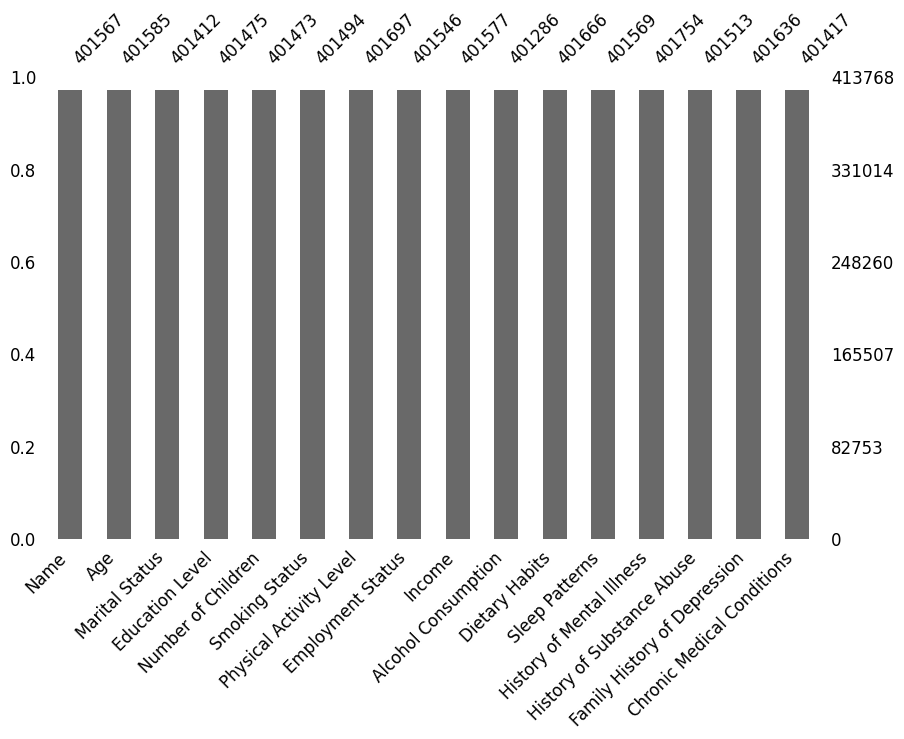

In [21]:
#!pip install missingno
import missingno as msno
msno.bar(df = df, figsize = (10,6),fontsize = 12);

Tespit edilen eksik verilerin temizlenmesi için sayısal değişkenlerin medyan ile kategorik değişkenlerin ise mod ile doldurulmasına karar verilmiştir. Sayısal değişkenlerin medyan ile doldurulmasının nedeni bu değişkenlerin aykırı değerlerden daha az etkilenmesini sağlamak içindir. 

In [22]:
numerical_features
# Eksik sayısal verileri medyan ile doldur
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())
# Eksik kategorik verileri mod ile doldur
categorical_features
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])
# Eksik verilerin durumunu kontrol et
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [23]:
df.shape

(413768, 16)

4) Kategorik Değişkenlerin Analizi

In [24]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [25]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,Name,Marital Status,Education Level,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,Married,Bachelor's Degree,Non-smoker,Active,Unemployed,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,Married,High School,Non-smoker,Sedentary,Employed,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,Widowed,Master's Degree,Non-smoker,Sedentary,Employed,Low,Unhealthy,Good,No,No,Yes,No


In [26]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["Physical Activity Level"].unique()

array(['Active', 'Sedentary', 'Moderate'], dtype=object)

In [27]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 196851 unique values in "Name" categorical feature.

There are 4 unique values in "Marital Status" categorical feature.

There are 5 unique values in "Education Level" categorical feature.

There are 3 unique values in "Smoking Status" categorical feature.

There are 3 unique values in "Physical Activity Level" categorical feature.

There are 2 unique values in "Employment Status" categorical feature.

There are 3 unique values in "Alcohol Consumption" categorical feature.

There are 3 unique values in "Dietary Habits" categorical feature.

There are 3 unique values in "Sleep Patterns" categorical feature.

There are 2 unique values in "History of Mental Illness" categorical feature.

There are 2 unique values in "History of Substance Abuse" categorical feature.

There are 2 unique values in "Family History of Depression" categorical feature.

There are 2 unique values in "Chronic Medical Conditions" categorical feature.



In [28]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")


Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64
 *********************************************
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
 *********************************************
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
 *********************************************
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
 *********************************************
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64

In [29]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
alcohol_categories = df["Alcohol Consumption"].unique().tolist()[::-1]
alcohol_categories


['Low', 'High', 'Moderate']

In [30]:
from pandas.api.types import CategoricalDtype

df["Alcohol Consumption"] = df["Alcohol Consumption"].astype(CategoricalDtype(categories = alcohol_categories, ordered = True))

In [31]:
df["Alcohol Consumption"].head()

0    Moderate
1        High
2         Low
3    Moderate
4         Low
Name: Alcohol Consumption, dtype: category
Categories (3, object): ['Low' < 'High' < 'Moderate']

Kategorik Değişkenlerde Görselleştirme

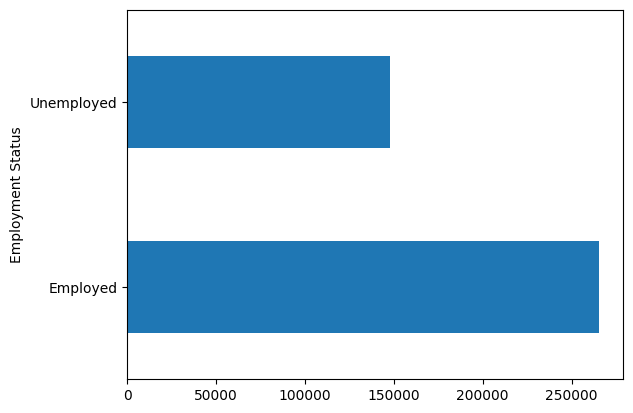

In [32]:
df['Employment Status'].value_counts().plot.barh(); # Kategorik bir değişkendeki kategorilerin gözlem sayısı

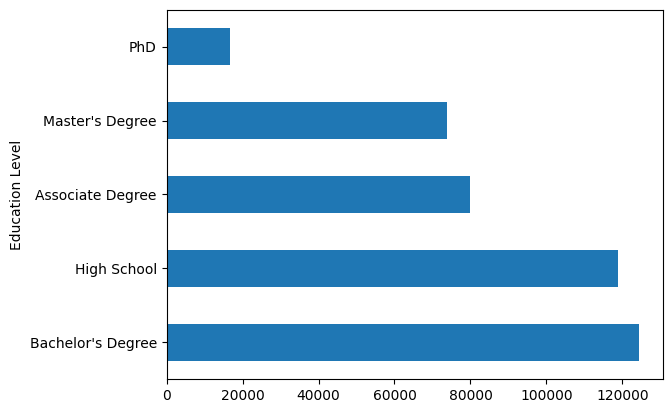

In [33]:
df['Education Level'].value_counts().plot.barh();

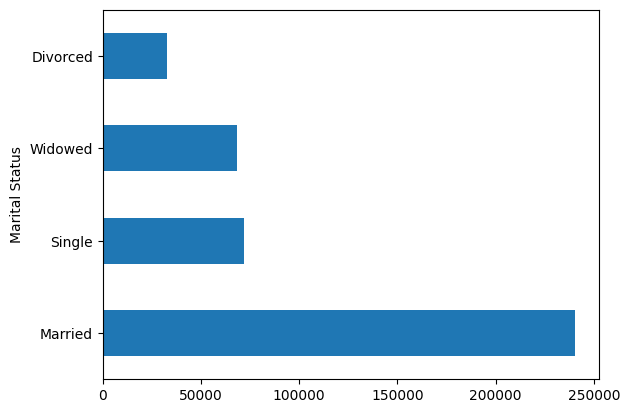

In [34]:
df['Marital Status'].value_counts().plot.barh();

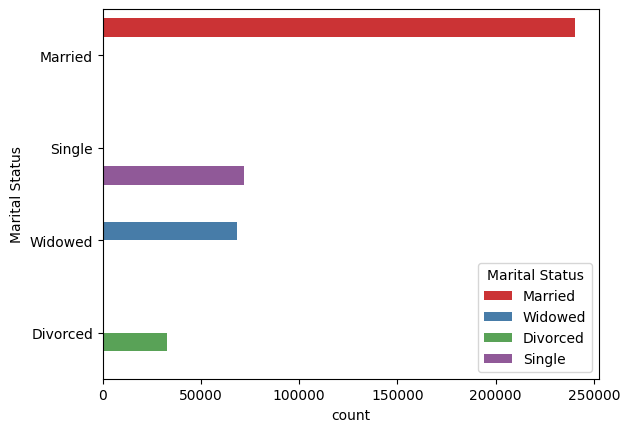

In [35]:
sns.countplot(data = df,
              y = "Marital Status",
              hue = "Marital Status",
              order = df["Marital Status"].value_counts().index,
              palette = "Set1");

5) Sürekli Değişken Analizi

In [36]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,Age,Number of Children,Income
0,31,2,26265.67
1,55,1,42710.36
2,78,1,125332.79
3,58,3,9992.78
4,18,0,8595.08


In [37]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,413768.0,49.000713,18.158759,18.00,33.00,49.000,65.0,80.00
Number of Children,413768.0,1.298972,1.237054,0.00,0.00,1.000,2.0,4.00
Income,413768.0,50661.707971,40624.100565,0.41,21001.03,37520.135,76616.3,209995.22


In [38]:
 num_df = df.select_dtypes(include = ["float", "int"]);

for col in num_df.columns:
    print(f"**********{col}**********")
    print(f"Mean value of {col} is {num_df[col].mean():.2f}")
    print(f"Std value of {col} is {num_df[col].std():.2f}")
    print(f"Max value of {col} is {num_df[col].max()}")
    print(f"Min value of {col} is {num_df[col].min()}")
    print(f"Count value of {col} is {num_df[col].count()}")
    print(f"Median value of {col} is {num_df[col].median()}\n")

**********Age**********
Mean value of Age is 49.00
Std value of Age is 18.16
Max value of Age is 80
Min value of Age is 18
Count value of Age is 413768
Median value of Age is 49.0

**********Number of Children**********
Mean value of Number of Children is 1.30
Std value of Number of Children is 1.24
Max value of Number of Children is 4
Min value of Number of Children is 0
Count value of Number of Children is 413768
Median value of Number of Children is 1.0

**********Income**********
Mean value of Income is 50661.71
Std value of Income is 40624.10
Max value of Income is 209995.22
Min value of Income is 0.41
Count value of Income is 413768
Median value of Income is 37520.134999999995



Sayısal Değişkenleri Görselleştirme

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

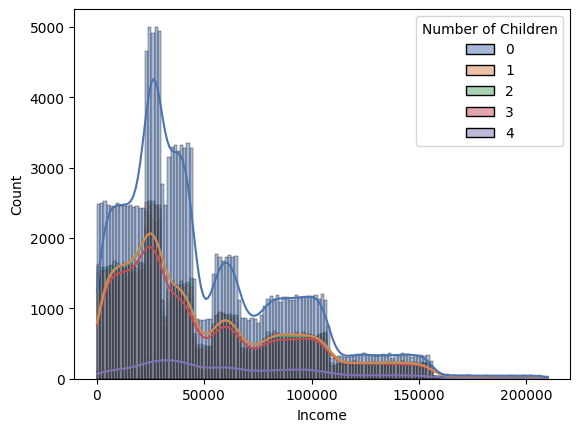

In [39]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "Income", kde = True, hue = "Number of Children",palette = "deep");

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


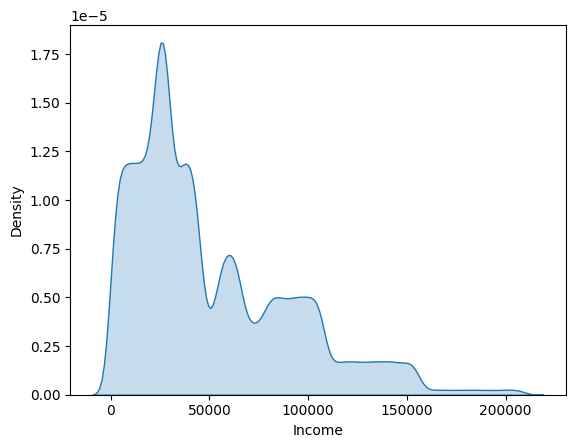

In [40]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['Income'], fill = True);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

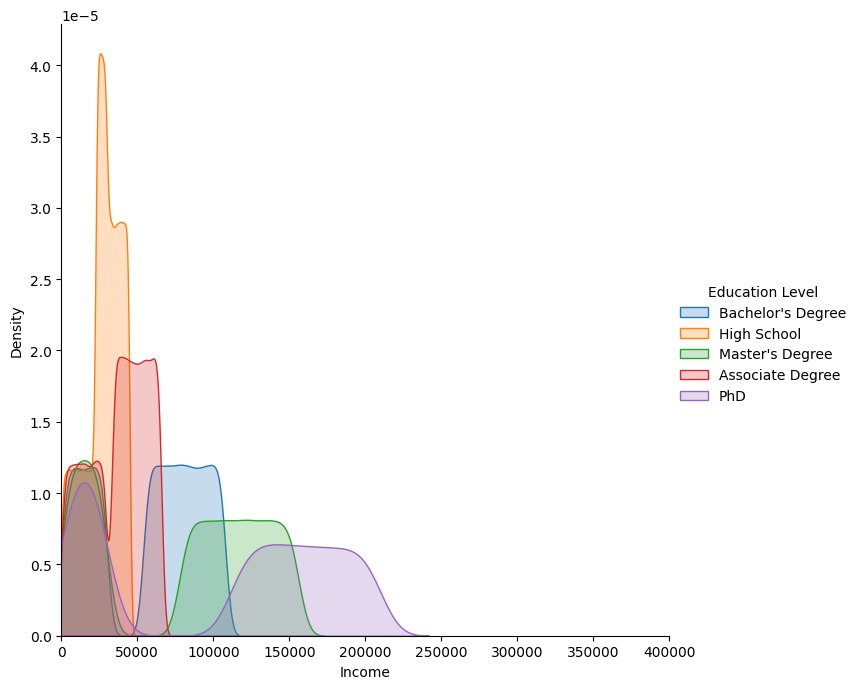

In [41]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "Education Level",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "Income", fill = True).add_legend();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

<Figure size 1200x800 with 0 Axes>

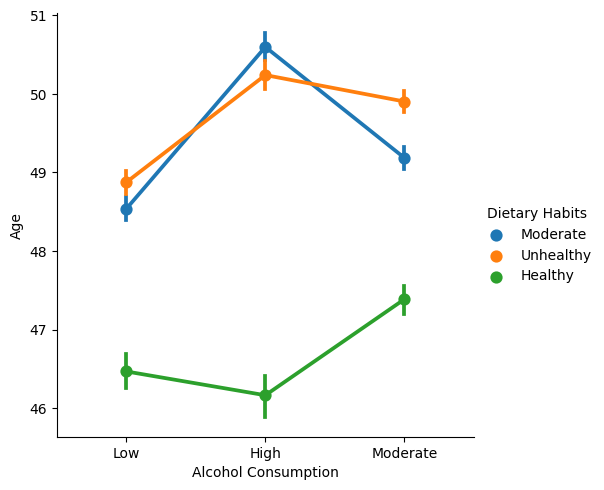

In [42]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "Alcohol Consumption", y = "Age", hue = "Dietary Habits", kind = "point");


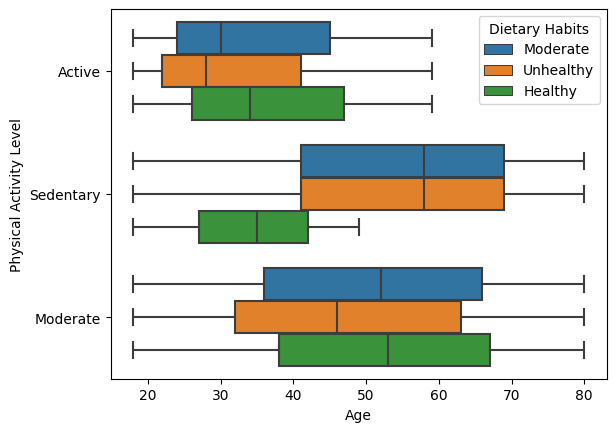

In [43]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "Age",
            y = "Physical Activity Level",
            hue = "Dietary Habits");

7) Sonuç

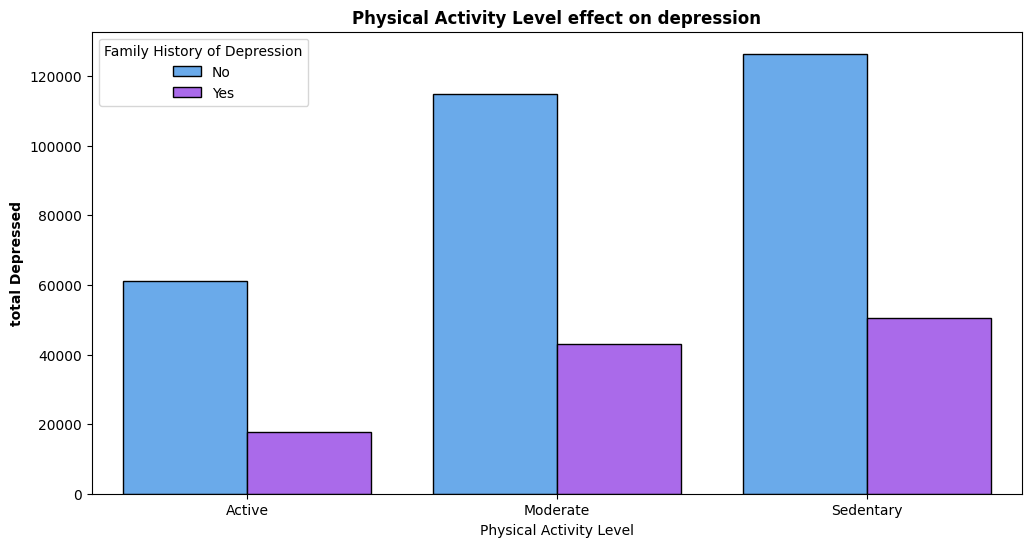

In [44]:
dep_active = df.groupby(['Family History of Depression','Physical Activity Level'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')

fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Physical Activity Level', y = 'Count Of Family History of Depression',data =dep_active,palette="cool",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('Physical Activity Level effect on depression',weight='bold')
plt.xlabel('Physical Activity Level')
plt.ylabel('total Depressed',weight="bold")
plt.show()

In [45]:
smokers = df["Smoking Status"].value_counts()
smokers 

Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64

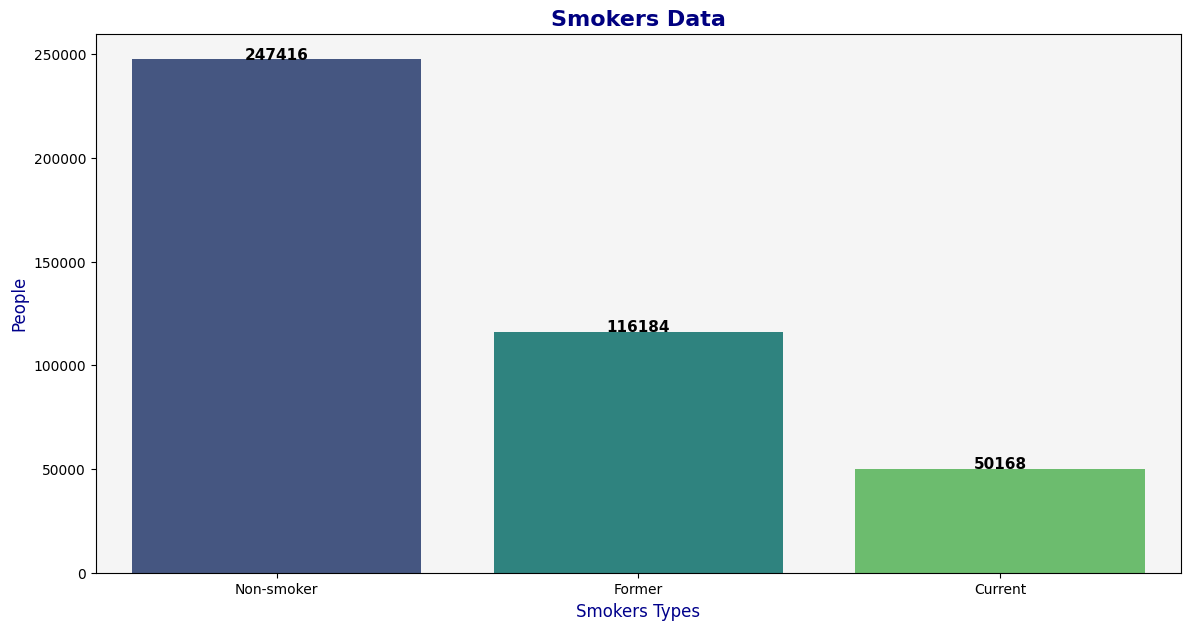

In [46]:
smokers_df = smokers.reset_index()
smokers_df.columns = ['Smoking Status', 'Total Value']
plt.figure(figsize=(14,7))
smok_plot = sns.barplot(x="Smoking Status", y="Total Value", data=smokers_df,palette='viridis')
for i, value in enumerate(smokers_df['Total Value']):
    plt.text(i, value + 2, f'{value}', ha='center', color='black', fontsize=11, fontweight='bold')
plt.title("Smokers Data", weight='bold', fontsize=16, color='navy')
plt.xlabel("Smokers Types", fontsize=12, color='darkblue')
plt.ylabel("People", fontsize=12, color='darkblue')

plt.gca().set_facecolor('whitesmoke')
plt.show()

In [47]:
age= df['Name'].count()

a=df[(df['Age'] >=18) & (df['Age'] <=39) & (df['Smoking Status'] !='Non-smoker')]
adult=a.shape[0]
adult_p= (adult/age)*100
adult_p= round(adult_p, 2)

ah=df[(df['Age'] >=40) & (df['Age'] <=59) & (df['Smoking Status'] !='Non-smoker')]
adult_h=ah.shape[0]
adult_h_p= (adult_h/age)*100
adult_h_p= round(adult_h_p, 2)

o=df[df['Age'] >=60 & (df['Smoking Status'] !='Non-smoker')]
old=o.shape[0]
old_p= (old/age)*100
old_p = round(old_p, 2)


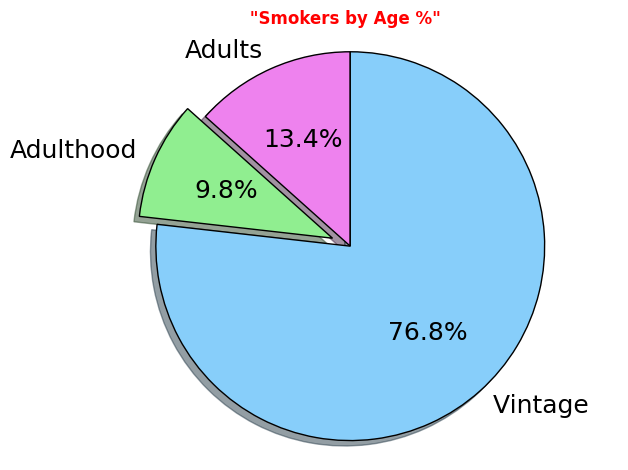

In [48]:
labels = ['Adults','Adulthood','Vintage ']
sizes = [adult_p,adult_h_p,old_p]
colors = ['violet','lightgreen','lightskyblue'] 
explode = (0, 0.1,0) 
plt.pie(sizes,explode=explode,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90,shadow=True,textprops={'fontsize': 18},
       wedgeprops={'edgecolor': 'black'})
plt.title(' "Smokers by Age %"',fontweight='bold',color = 'red')
plt.axis('equal')
plt.tight_layout()
plt.show()


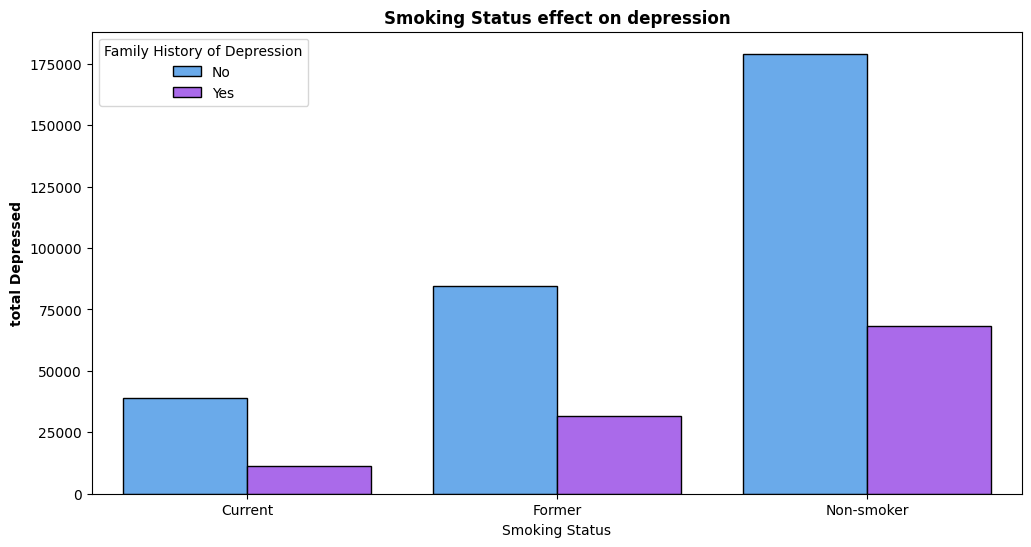

In [49]:
dep_smoke = df.groupby(['Family History of Depression','Smoking Status'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Smoking Status', y = 'Count Of Family History of Depression',data =dep_smoke,palette="cool",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('Smoking Status effect on depression',weight='bold')
plt.xlabel('Smoking Status')
plt.ylabel('total Depressed',weight="bold")
plt.show()

/tmp/ipykernel_17/150995222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alc_dep = df.groupby(['Alcohol Consumption','Family History of Depression'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')


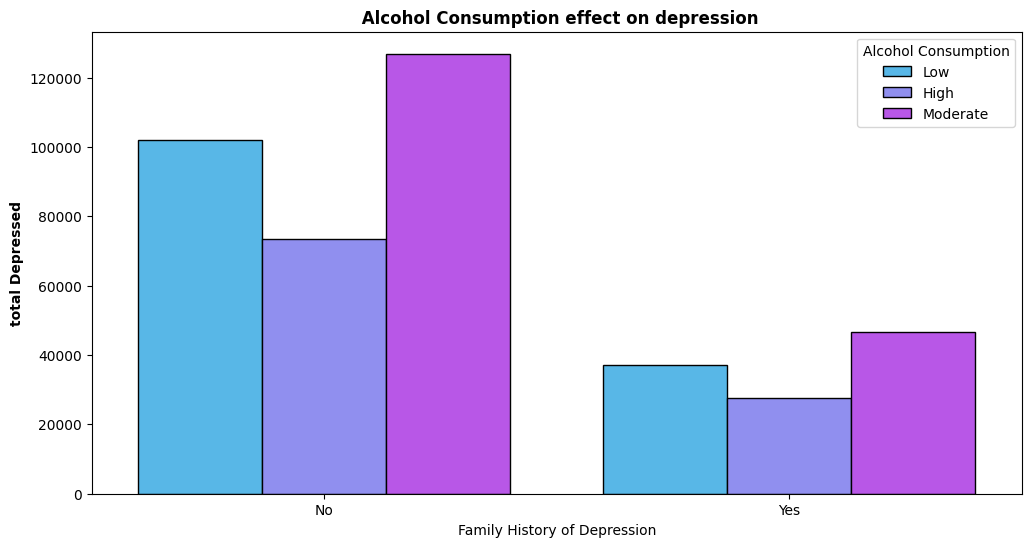

In [50]:
alc_dep = df.groupby(['Alcohol Consumption','Family History of Depression'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Family History of Depression', y = 'Count Of Family History of Depression',data =alc_dep,palette="cool",
            edgecolor='black', hue = 'Alcohol Consumption')

plt.title(' Alcohol Consumption effect on depression',weight='bold')
plt.xlabel('Family History of Depression')
plt.ylabel('total Depressed',weight="bold")
plt.show()


In [51]:
alc_dep

,Alcohol Consumption,Family History of Depression,Count Of Family History of Depression
0,Low,No,102031
1,Low,Yes,37219
2,High,No,73584
3,High,Yes,27494
4,Moderate,No,126900
5,Moderate,Yes,46540


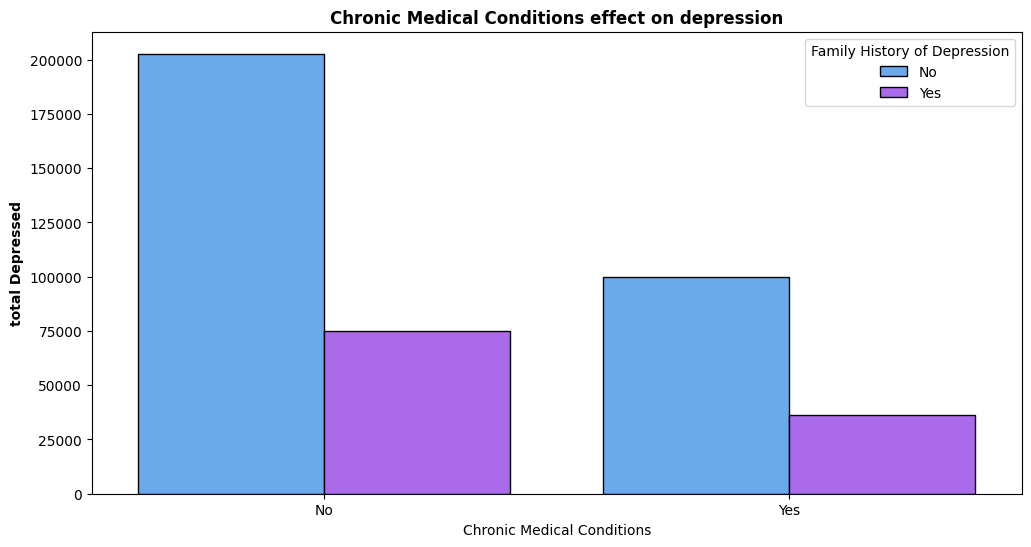

In [52]:
dep_med = df.groupby(['Family History of Depression','Chronic Medical Conditions'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Chronic Medical Conditions', y = 'Count Of Family History of Depression',data =dep_med,palette="cool",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('Chronic Medical Conditions effect on depression',weight='bold')
plt.xlabel('Chronic Medical Conditions')
plt.ylabel('total Depressed',weight="bold")
plt.show()

In [53]:
dep_med


,Family History of Depression,Chronic Medical Conditions,Count Of Family History of Depression
0,No,No,202735
1,No,Yes,99780
2,Yes,No,74826
3,Yes,Yes,36427


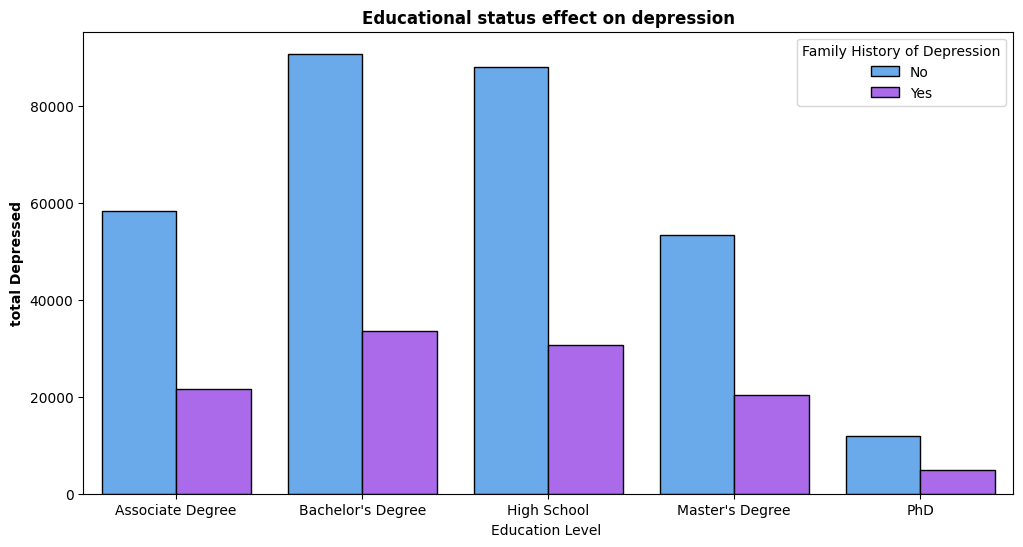

In [54]:
dep_Education = df.groupby(['Family History of Depression','Education Level'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Education Level', y = 'Count Of Family History of Depression',data =dep_Education,palette="cool",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('Educational status effect on depression',weight='bold')
plt.xlabel('Education Level ')
plt.ylabel('total Depressed',weight="bold")
plt.show()

In [55]:
dep_Education

,Family History of Depression,Education Level,Count Of Family History of Depression
0,No,Associate Degree,58328
1,No,Bachelor's Degree,90789
2,No,High School,88152
3,No,Master's Degree,53355
4,No,PhD,11891
5,Yes,Associate Degree,21671
6,Yes,Bachelor's Degree,33540
7,Yes,High School,30775
8,Yes,Master's Degree,20413
9,Yes,PhD,4854


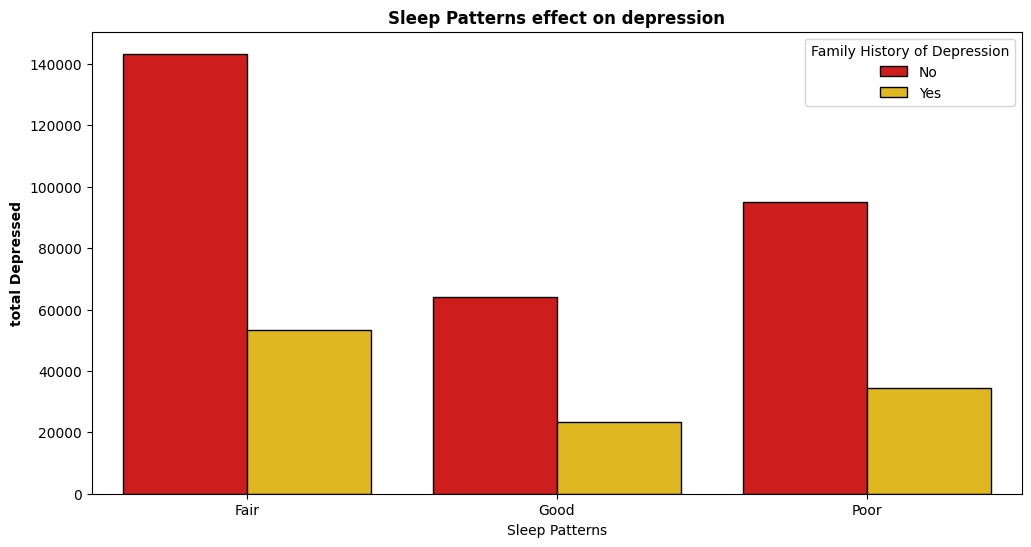

In [56]:
dep_sleep = df.groupby(['Family History of Depression','Sleep Patterns'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'Sleep Patterns', y = 'Count Of Family History of Depression',data =dep_sleep,palette="hot",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('Sleep Patterns effect on depression',weight='bold')
plt.xlabel('Sleep Patterns')
plt.ylabel('total Depressed',weight="bold")
plt.show()

poor sleep pattern'in depresyona neden olmadığı görülmektedir

In [57]:
total_people= df['Name'].count()

adult_c=df[(df['Age'] >=18) & (df['Age'] <=39) & (df['Family History of Depression'] =='Yes')]
total_adult=adult_c.shape[0]
total_adult_per= (total_adult/total_people)*100
total_adult_per= round(total_adult_per, 2)

adulthood_c=df[(df['Age'] >=40) & (df['Age'] <=59) & (df['Family History of Depression'] =='Yes')]
total_adulthood=adulthood_c.shape[0]
total_adulthood_per= (total_adulthood/total_people)*100
total_adulthood_per= round(total_adulthood_per, 2)

old_c = df[(df['Age'] >=60 ) & (df['Family History of Depression'] =='Yes')]
total_old = old_c.shape[0]
total_old_per = (total_old/total_people)*100
total_old_per = round(total_old_per, 2)

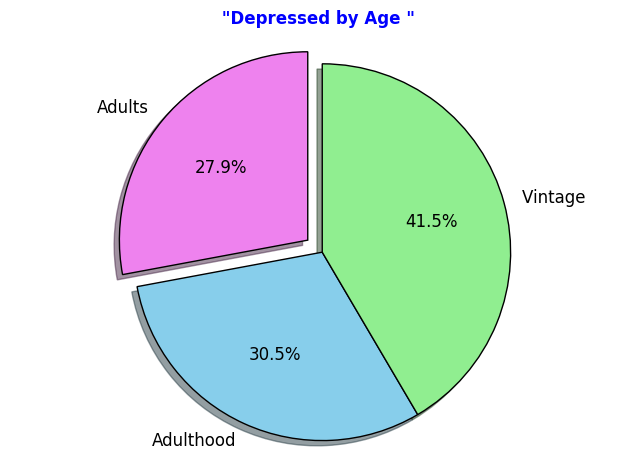

In [58]:
labels = ['Adults','Adulthood','Vintage ']
sizes = [total_adult_per,total_adulthood_per,total_old_per]
colors = ['violet','skyblue','lightgreen'] 
explode = (0.1, 0,0) 
plt.pie(sizes,explode=explode,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90,shadow=True,textprops={'fontsize': 12},
       wedgeprops={'edgecolor': 'black'})
plt.title(' "Depressed by Age "',fontweight='bold',color = 'blue')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [59]:
Bachelor_c=df[(df['Education Level'] == "Bachelor's Degree") & (df['Family History of Depression'] =='Yes')]
total_Bachelor=Bachelor_c.shape[0]
total_Bachelor_per= (total_Bachelor/total_people)*100
total_Bachelor_per= round(total_Bachelor_per, 2)

HighSchool_c = df[(df['Education Level'] =='High School' ) & (df['Family History of Depression'] =='Yes')]
total_HighSchool= HighSchool_c.shape[0]
total_HighSchool_per = (total_HighSchool/total_people)*100
total_HighSchool_per = round(total_HighSchool_per, 2)

Master_c = df[(df['Education Level'] =="Master's Degree" ) & (df['Family History of Depression'] =='Yes')]
total_Master=Master_c.shape[0]
total_Master_per = (total_Master/total_people)*100
total_Master_per = round(total_Master_per, 2)

PhD_c = df[(df['Education Level'] =='PhD' ) & (df['Family History of Depression'] =='Yes')]
total_PhD = PhD_c.shape[0]
total_PhD_per = (total_PhD/total_people)*100
total_PhD_per = round(total_PhD_per, 2)

In [60]:
total_people= df['Name'].count()
associate_c=df[(df['Education Level'] =='Associate Degree') & (df['Family History of Depression'] =='Yes')]
total_associate=associate_c.shape[0]
total_associate_per= (total_associate/total_people)*100
total_associate_per= round(total_associate_per, 2)

Bachelor_c=df[(df['Education Level'] == "Bachelor's Degree") & (df['Family History of Depression'] =='Yes')]
total_Bachelor=Bachelor_c.shape[0]
total_Bachelor_per= (total_Bachelor/total_people)*100
total_Bachelor_per= round(total_Bachelor_per, 2)

HighSchool_c = df[(df['Education Level'] =='High School' ) & (df['Family History of Depression'] =='Yes')]
total_HighSchool= HighSchool_c.shape[0]
total_HighSchool_per = (total_HighSchool/total_people)*100
total_HighSchool_per = round(total_HighSchool_per, 2)

Master_c = df[(df['Education Level'] =="Master's Degree" ) & (df['Family History of Depression'] =='Yes')]
total_Master=Master_c.shape[0]
total_Master_per = (total_Master/total_people)*100
total_Master_per = round(total_Master_per, 2)

PhD_c = df[(df['Education Level'] =='PhD' ) & (df['Family History of Depression'] =='Yes')]
total_PhD = PhD_c.shape[0]
total_PhD_per = (total_PhD/total_people)*100
total_PhD_per = round(total_PhD_per, 2)

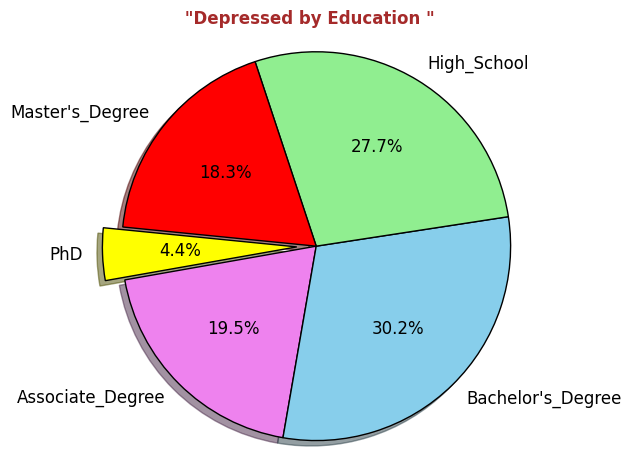

In [61]:
labels = ['Associate_Degree',"Bachelor's_Degree",'High_School',"Master's_Degree",'PhD']
sizes = [total_associate_per,total_Bachelor_per,total_HighSchool_per,total_Master_per,total_PhD_per]
colors = ['violet','skyblue','lightgreen','red','yellow'] 
explode = (0, 0,0,0,0.1) 
plt.pie(sizes,explode=explode,labels=labels, colors=colors,autopct='%1.1f%%',startangle=190,shadow=True,textprops={'fontsize': 12},
       wedgeprops={'edgecolor': 'black'})
plt.title(' "Depressed by Education "',fontweight='bold',color = 'brown')
plt.axis('equal')
plt.tight_layout()
plt.show()

6) Aykırı Değer Analizi

Eksik verileri analiz ettikten sonra, aykırı değer analizi yapmak modelin doğruluğunu artacaktır. Outliers analizi için farklı yöntemler mevcuttur ancak en çok Z-skoru yöntemi veya IQR yöntemi kullanılmaktadır. Bu analizde IQR yöntemi hem bu aykırı değerlerin tespitinde hem de temizlenmesinde kullanılmıştır. 

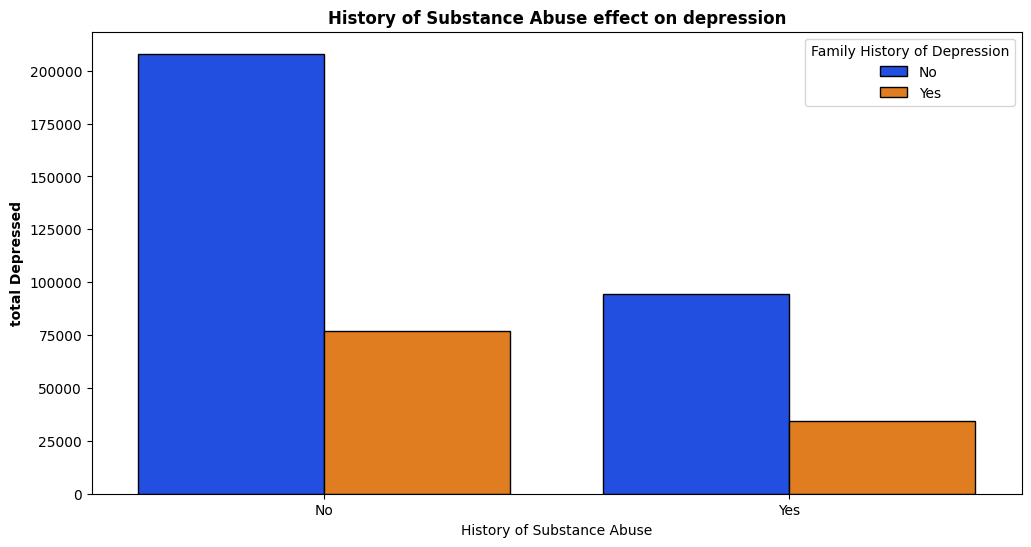

In [62]:
dep_sub = df.groupby(['Family History of Depression','History of Substance Abuse'])['Family History of Depression'].count().reset_index(name ='Count Of Family History of Depression')
fig, ax = plt.subplots(figsize= (12,6))
sns.barplot(x = 'History of Substance Abuse', y = 'Count Of Family History of Depression',data =dep_sub,palette="bright",
            edgecolor='black', hue = 'Family History of Depression')

plt.title('History of Substance Abuse effect on depression',weight='bold')
plt.xlabel('History of Substance Abuse')
plt.ylabel('total Depressed',weight="bold")
plt.show()


In [63]:
dep_sub 

,Family History of Depression,History of Substance Abuse,Count Of Family History of Depression
0,No,No,208000
1,No,Yes,94515
2,Yes,No,76880
3,Yes,Yes,34373


In [64]:
# Sayısal Değişkenlerde Uç Noktalar Analizi(IQR Yöntemi ile)
numerical_features = ['Age', 'Number of Children', 'Income']

def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Aykırı değerleri döndür
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return lower_bound, upper_bound, outliers

for col in numerical_features:
    lower_bound, upper_bound, outliers = detect_outliers_iqr(df, col)
    print(f"--- {col} için Uç Değerler ---")
    print(f"Alt Sınır: {lower_bound}")
    print(f"Üst Sınır: {upper_bound}")
    print(f"Tespit Edilen Uç Değerler:\n{outliers}")
    print("\n")

--- Age için Uç Değerler ---
Alt Sınır: -15.0
Üst Sınır: 113.0
Tespit Edilen Uç Değerler:
Empty DataFrame
Columns: [Name, Age, Marital Status, Education Level, Number of Children, Smoking Status, Physical Activity Level, Employment Status, Income, Alcohol Consumption, Dietary Habits, Sleep Patterns, History of Mental Illness, History of Substance Abuse, Family History of Depression, Chronic Medical Conditions]
Index: []


--- Number of Children için Uç Değerler ---
Alt Sınır: -3.0
Üst Sınır: 5.0
Tespit Edilen Uç Değerler:
Empty DataFrame
Columns: [Name, Age, Marital Status, Education Level, Number of Children, Smoking Status, Physical Activity Level, Employment Status, Income, Alcohol Consumption, Dietary Habits, Sleep Patterns, History of Mental Illness, History of Substance Abuse, Family History of Depression, Chronic Medical Conditions]
Index: []


--- Income için Uç Değerler ---
Alt Sınır: -62421.875
Üst Sınır: 160039.20500000002
Tespit Edilen Uç Değerler:
                   Name  

Yapılan IQR analizi sonucunda sayısal değerler içinde income sütununda aykırı değerler olduğu gözlemlenmiştir. Nümerik değişkenler içinde sadece income sütunun bazı değerlerinde aykırı değerler olduğu için bu değerleri IQR yöntemi ile silmeye karar verdik. 

In [65]:
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Sayısal sütunlar: 
numerical_features

# Aykırı değerleri dışlamak
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)



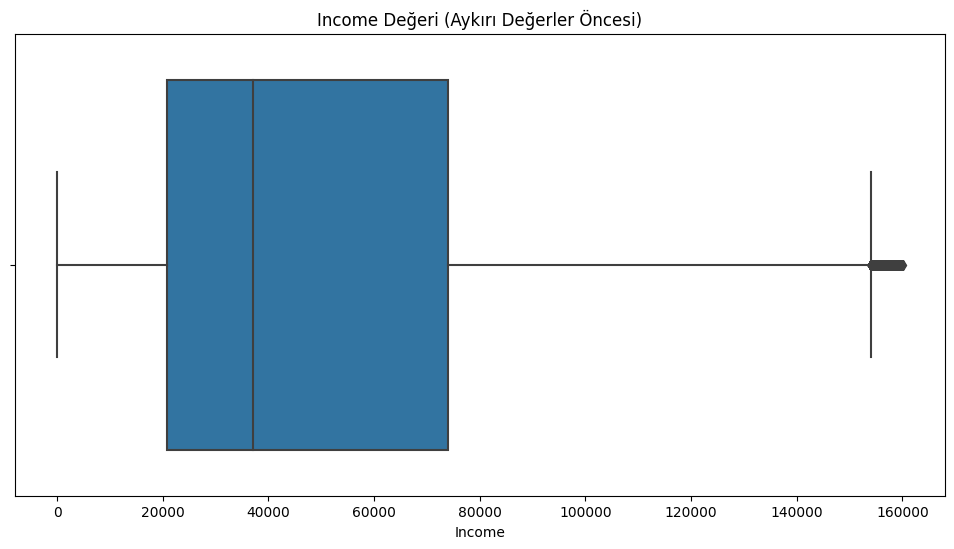

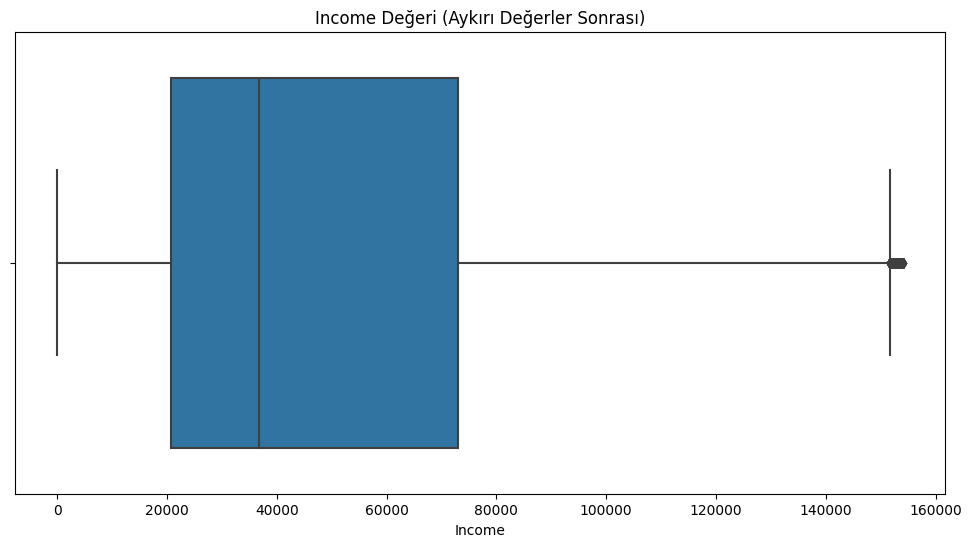

In [66]:
# Aykırı değerleri dışla (temizleme işlemi)
df_cleaned = df.copy()  # Veriyi temizlemeden önce yedek alalım
for col in numerical_features:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Aykırı değerlerin temizlenmiş olduğunu görsel olarak göstermek (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Income'])
plt.title('Income Değeri (Aykırı Değerler Öncesi)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['Income'])
plt.title('Income Değeri (Aykırı Değerler Sonrası)')
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


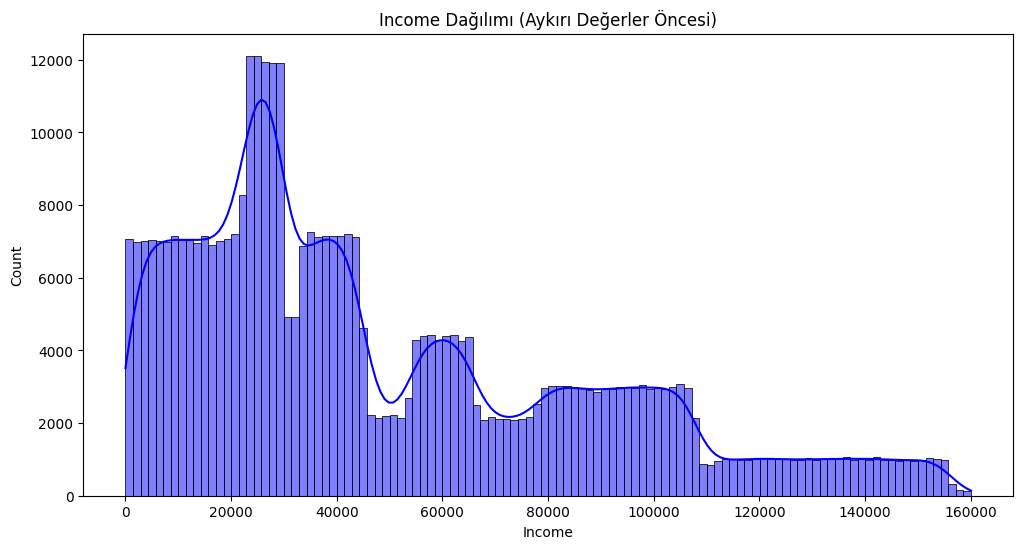

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


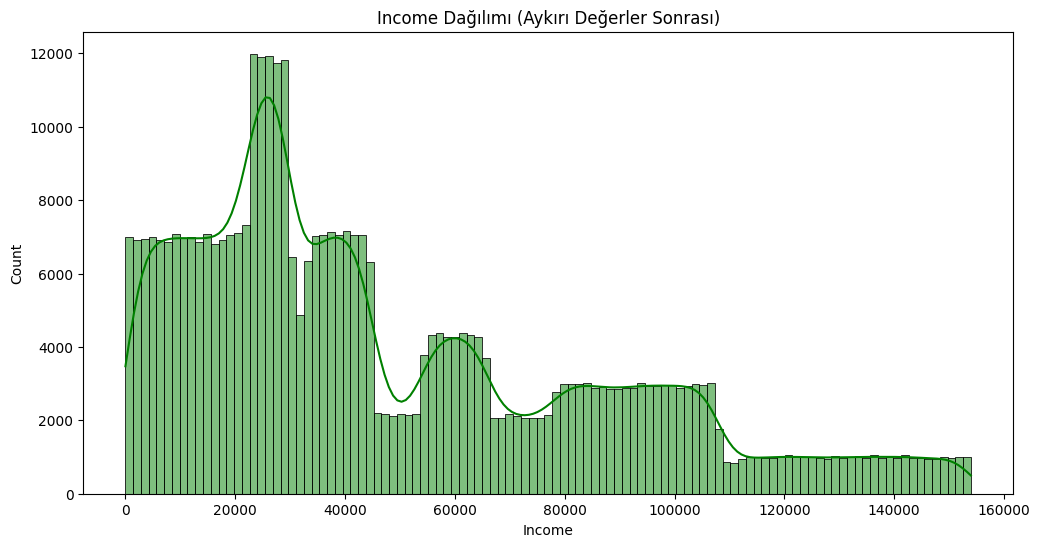

In [67]:
# Aykırı değerlerin temizlenmiş olduğunu daha detaylı görmek için histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], kde=True, color='blue')
plt.title('Income Dağılımı (Aykırı Değerler Öncesi)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Income'], kde=True, color='green')
plt.title('Income Dağılımı (Aykırı Değerler Sonrası)')
plt.show()


In [68]:
df.shape # Aykırı değerler silindikten sonra elimizde kalan veri miktarı

(408611, 16)

413.768 satırdan 42.053 satır silinmiş. Bu veri setinin %10 kadarının silindiği anlamına gelir.

7) Future Engineering 

Yapılan analizleri yorumlayacak olursak;
Evli ve işi olan kişilerin depresyona yakalanma sayısı bekarlara ve işi olmayan kişilere göre çok daha yüksektir. Ayrıca hareketsiz(sedantary) yaşamı tercih edenlerin de depresyona yakalanma şansının yüksek olduğu görülmüştür. Bu yüzden sağlıklı bir psikiloji için fiziksel aktivite düzeyinin kaçınılmaz olduğu bir gerçektir ancak uyku düzeylerine bakıldığında normalde beklediğimiz sonuç analizden çıkarılamamıştır. Normalde iyi bir uyku düzeyinin depresyon vakalarını azaltması beklenirken tam tersi bir durum gözlenmiştir. Yeterli ve makul uyku düzeyine sahip olan kişilerde depresyon daha çok görülmüştür. Yaşa baktığımızda ise depresyon en çok %41.5 ile yaşlı(vintage) bireylerde görülmüştür. Yetişkinlik çağındaki kişlerle aralarında yaklaşık %15'lik bir fark vardır. Ayrıca sigara kullanımına baktığımız zamanda yaşlılarda sigara kullanma eğiliminin daha yüksek olduğu fark edilmiştir ancak sigara kullanmayan(non-smoker) kişilerin daha depresif olduğu görülmüştür. Bu da ayrıca beklenmeyen bir sonuç olmuştur. Depresyona yakalanan kişilerin eğitim düzeyine baktığımızda ise lise mezunu ve lisans mezunları arasında az bir fark olduğu ancak lisans mezunlarının depresyona yaklanma eğilimlerinin daha fazla olduğu gözlemlenmiştir. Bir diğer şaşırtıcı sonuç ise ailesinde depresyon geçmişi bulunmayan bireylerin bulunanlara göre daha fazla depresyona yakalanmalarıdır. Aynı zamanda kronik medikal geçmişi olmayan bireylerin de olanlara nazaran depresyona yakalanma sayıları daha fazladır. Bu analize göre yaşlı, herhangi bir hastalık geçimişi ve ailesinde depresyon geçmişi bulunmayan eğitim düzeyi yüksek, sigara tüketimi fazla, alkol kullanımında ortalama içici, evli ve işi olan bireylerin depresyona yakalnma eğilimlerinin daha yüksek olduğu görülmüştür. Bu analiz makine öğreniminde sınıflama yapılarak depreyona yönelik bir ilacın tasarlanmasında kullanılabilir. Kategorilere ayrılan depresyon hastalarının neye ihtiyacı olduğuna bakılarak çok daha doğru bir tedavi süreci tasarlanabilir. 